#Mount on Google Drive

In [1]:
#import required packages
import os
import shutil
import math 
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten
from keras import backend as K 
from keras.utils import np_utils
import keras
from keras.models import Model
from keras.layers.core import Layer
import keras.backend as K
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#Data Preperation

In [0]:
#unzip dataset
%cd /content/gdrive/My Drive/Deep Learning and CNN/weather !unzip dataset2.zip %cd dataset2

/content/gdrive/My Drive/Deep Learning and CNN/weather
Archive:  dataset2.zip
   creating: dataset2/
  inflating: dataset2/cloudy1.jpg    
  inflating: dataset2/cloudy10.jpg   
  inflating: dataset2/cloudy100.jpg  
  inflating: dataset2/cloudy101.jpg  
  inflating: dataset2/cloudy102.jpg  
  inflating: dataset2/cloudy103.jpg  
  inflating: dataset2/cloudy104.jpg  
  inflating: dataset2/cloudy105.jpg  
  inflating: dataset2/cloudy106.jpg  
  inflating: dataset2/cloudy107.jpg  
  inflating: dataset2/cloudy108.jpg  
  inflating: dataset2/cloudy109.jpg  
  inflating: dataset2/cloudy11.jpg   
  inflating: dataset2/cloudy110.jpg  
  inflating: dataset2/cloudy111.jpg  
  inflating: dataset2/cloudy112.jpg  
  inflating: dataset2/cloudy113.jpg  
  inflating: dataset2/cloudy114.jpg  
  inflating: dataset2/cloudy115.jpg  
  inflating: dataset2/cloudy116.jpg  
  inflating: dataset2/cloudy117.jpg  
  inflating: dataset2/cloudy118.jpg  
  inflating: dataset2/cloudy119.jpg  
  inflating: dataset2/clo

In [0]:
cd /content/gdrive/My Drive/DL_CNN/weather

/content/gdrive/My Drive/Deep Learning and CNN/weather


In [0]:
mkdir cloudy  rain shine sunrise

In [0]:
source = '/content/gdrive/My Drive/DL_CNN/weather/dataset2'
cloudy_path = '/content/gdrive/My Drive/DL_CNN/weather/cloudy'
rain_path = '/content/gdrive/My Drive/DL_CNN/weather/rain'
sunrise_path = '/content/gdrive/My Drive/DL_CNN/weather/sunrise'
shine_path = '/content/gdrive/My Drive/DL_CNN/weather/shine'

In [0]:
#copy files into corresponding folders based on filenames
files = os.listdir(source)

for f in files:
    if f.startswith('cloudy'):
        shutil.copy(os.path.join(source, f), cloudy_path)
    elif f.startswith('rain'):
        shutil.copy(os.path.join(source, f), rain_path)
    elif f.startswith('sunrise'):
        shutil.copy(os.path.join(source, f), sunrise_path)
    elif f.startswith('shine'):
        shutil.copy(os.path.join(source, f), shine_path)

In [0]:
#print number of images in cloudy folder
all_cloudy = os.listdir(cloudy_path)
len(all_cloudy)

300

In [0]:
#print number of images in rain folder
all_rain = os.listdir(rain_path)
len(all_rain)

215

In [0]:
#print number of images in shine folder
all_shine = os.listdir(shine_path)
len(all_shine)

253

In [0]:
#print number of images in sunrise folder
all_sunrise = os.listdir(sunrise_path)
len(all_sunrise)

357

In [0]:
cd /content/gdrive/My Drive/Deep Learning and CNN/weather

/content/gdrive/My Drive/Deep Learning and CNN/weather


In [0]:
mkdir split_dataset dataset

In [0]:
src1 = '/content/gdrive/My Drive/Deep Learning and CNN/weather/cloudy'
src2 = '/content/gdrive/My Drive/Deep Learning and CNN/weather/rain'
src3 = '/content/gdrive/My Drive/Deep Learning and CNN/weather/shine'
src4 = '/content/gdrive/My Drive/Deep Learning and CNN/weather/sunrise'
dst = '/content/gdrive/My Drive/Deep Learning and CNN/weather/dataset'

In [0]:
#move categorized data into dataset folder
shutil.move(src1, dst)
shutil.move(src2, dst)
shutil.move(src3, dst)
shutil.move(src4, dst)

'/content/gdrive/My Drive/Deep Learning and CNN/weather/dataset/sunrise'

In [0]:
pip install split-folders tqdm

In [0]:
pip install split-folders

In [0]:
import split_folders

# Split with a ratio
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('/content/gdrive/My Drive/Deep Learning and CNN/weather/dataset', output="/content/gdrive/My Drive/Deep Learning and CNN/weather/split_dataset", seed=1337, ratio=(.8, .1, .1)) # default values

Copying files: 1125 files [00:11, 93.99 files/s]


#Understand the data

In [0]:
#get path to root dir
base_dir_path = '/content/gdrive/My Drive/DL_CNN/weather/split_dataset'
train_dir_path = os.path.join(base_dir_path, 'train')
test_dir_path = os.path.join(base_dir_path, 'test')
val_dir_path = os.path.join(base_dir_path, 'val')

In [0]:
def getAllClassNames(dir_path):
    return os.listdir(dir_path)

In [0]:
def understandData(BASE_DIR_PATH):    
    train_dir_path = os.path.join(BASE_DIR_PATH,'train')
    #test_dir_path = os.path.join(BASE_DIR_PATH,'test')
    print("Number of Classes = ",len(os.listdir(train_dir_path)))
    AllClassNames = os.listdir(train_dir_path)
    #print("Class Names = ",AllClassNames)
#    print('CLASS NAME'+'\t'+'NUMBER OF IMAGES')    
#    for class_name in AllClassNames:
#        print(class_name+'\t',len(os.listdir(os.path.join(train_dir_path,class_name))))
    displaySampleImages(train_dir_path,AllClassNames)
    return

In [0]:
def readData(BASE_DIR_PATH):
    nb_of_train_files = 0
    nb_of_test_files = 0
    nb_of_val_files = 0
    train_dir_path = os.path.join(BASE_DIR_PATH,'train')
    test_dir_path = os.path.join(BASE_DIR_PATH,'test')
    val_dir_path = os.path.join(BASE_DIR_PATH,'val')
    AllClassNames_train = os.listdir(train_dir_path)
    AllClassNames_test = os.listdir(test_dir_path)
    AllClassNames_val = os.listdir(val_dir_path)
    print('Number of Classes in train DataSet: ',len(AllClassNames_train))
    print('Number of Classes in test DataSet: ',len(AllClassNames_test))
    print('Number of Classes in val DataSet: ',len(AllClassNames_val))        
    for class_name in AllClassNames:
        nb_of_train_files = nb_of_train_files + len(os.listdir(os.path.join(train_dir_path,class_name)))
        nb_of_test_files = nb_of_test_files + len(os.listdir(os.path.join(test_dir_path,class_name)))
        nb_of_val_files = nb_of_val_files + len(os.listdir(os.path.join(val_dir_path,class_name)))
    print('Number of train samples: ',nb_of_train_files)
    print('Number of test samples:',nb_of_test_files) 
    print('Number of val samples:',nb_of_val_files)   
    return

In [0]:
AllClassNames = getAllClassNames(train_dir_path)
num_of_classes = len(AllClassNames)
DictOfClasses = {i : AllClassNames[i] for i in range(0, len(AllClassNames))}

In [0]:
readData(base_dir_path)

Number of Classes in train DataSet:  4
Number of Classes in test DataSet:  4
Number of Classes in val DataSet:  4
Number of train samples:  899
Number of test samples: 115
Number of val samples: 111


In [0]:
im1 = Image.open("/content/gdrive/My Drive/DL_CNN/weather/split_dataset/train/cloudy/cloudy103.jpg")
im2 = Image.open('/content/gdrive/My Drive/DL_CNN/weather/split_dataset/train/shine/shine100.jpg')
im3 = Image.open('/content/gdrive/My Drive/DL_CNN/weather/split_dataset/train/rain/rain105.jpg')
im4 = Image.open('/content/gdrive/My Drive/DL_CNN/weather/split_dataset/train/sunrise/sunrise108.jpg')

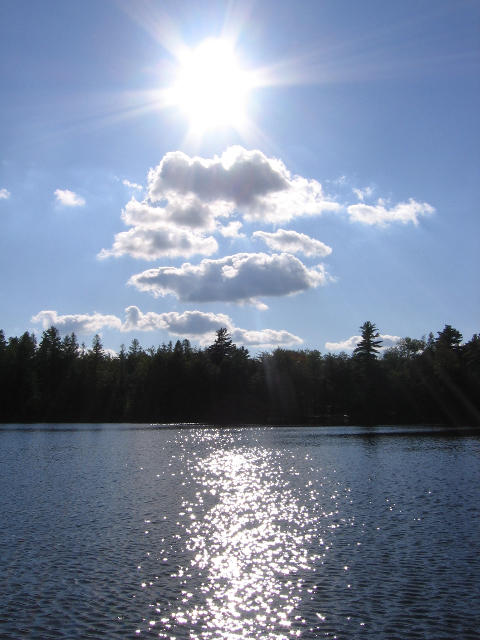

In [0]:
im2

#Callback methods

##Early Stopping

In [0]:
#Callback method of EarlyStop
class EarlyStop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nReached 0.3 loss so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks = EarlyStop()

##Learning Rate Scheduler

In [0]:
#Define the number of epochs and learning rate
epochs = 50
initial_lrate = 0.01

#Create Learning rate decay
def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop)) #when epoch = 7, lr = 0.01*0.96
    return lrate

#Define SGD paramenters
sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)
#Adaptive Learning rate
#Exponential
#Time based
#plateau

lr_sc = LearningRateScheduler(decay, verbose=1)

#Image Generator

In [6]:
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(
      rescale=1./255)

val_datagen = ImageDataGenerator(
      rescale=1./255)


# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir_path,  # This is the source directory for training images
        target_size=(224,224),  #Complete the parameters # All images will be resized to 224x224
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir_path,  # This is the source directory for training images
        target_size=(224,224),  #Complete the parameters # All images will be resized to 224x224
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 5 using test_datagen generator
validation_generator = val_datagen.flow_from_directory(
        val_dir_path,
        target_size=(224,224), #Complete the parameters
        batch_size=5,
        class_mode='categorical')

Found 899 images belonging to 4 classes.
Found 115 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


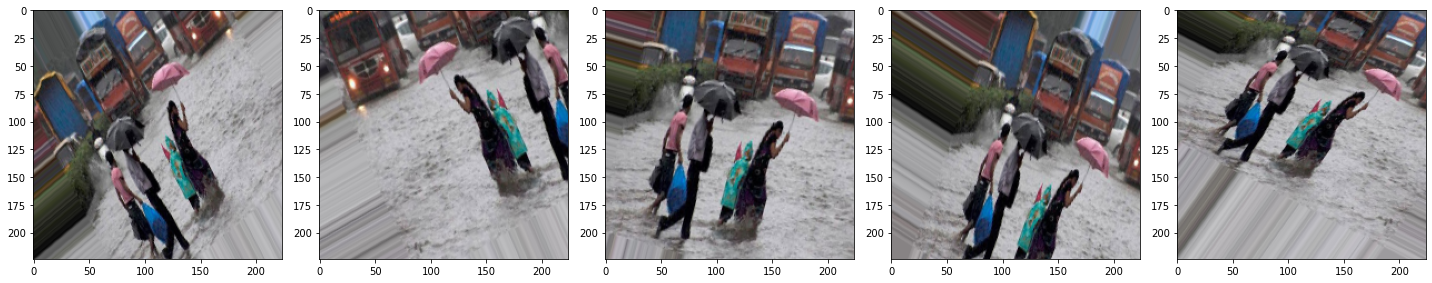

In [0]:
#Plot examples of generated images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

#Baseline model selection

##GoogLeNet

###Model building and fitting

In [0]:
# Create the Inception module
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    # 1X1 CONV
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    # 1X1 CONV --> 3x3 CONV
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    # 1X1 CONV --> 5x5 CONV
    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    # 3X3 MAXPOOL --> 1X1 CONV
    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    # Concatenate the layers
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [0]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [0]:
# Define the input layer
input_layer = Input(shape=(224, 224, 3)) # Use the actual input size

# Add the first CONV layer and MaxPOOL layer
x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_1_3x3/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(1, 1), name='max_pool_1_3x3/2')(x)

## Add Inception layer-1
x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

## Add Inception layer-2
x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

## Add MaxPool
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

## Add Inception layer-3
x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')

## Add Inception layer-4
x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

## Add Avg Pool
x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

## Add Dropout
x = Dropout(0.4)(x)

## Add Dense layer
x = x = Dense(4, activation='softmax', name='output')(x)

In [0]:
# Form the model
model_g = Model(input_layer, x, name='inception_v1')

In [0]:
model_g.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 224, 224, 64) 0           conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 96) 6240        max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

In [0]:
## Compile Model
model_g.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

###Model training and testing

In [0]:
history_g = model_g.fit_generator(
      train_generator,
      steps_per_epoch=90,  # 899 images = batch_size * steps
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=10,  # 115 images = batch_size * steps
      callbacks = [lr_sc],
      verbose=2)

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
 - 196s - loss: 1.1969 - acc: 0.4950 - val_loss: 1.4096 - val_acc: 0.5600
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
 - 39s - loss: 0.8164 - acc: 0.6251 - val_loss: 0.8606 - val_acc: 0.7600
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
 - 40s - loss: 0.7499 - acc: 0.6685 - val_loss: 0.7838 - val_acc: 0.5435
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.01.
 - 39s - loss: 0.7982 - acc: 0.6274 - val_loss: 0.2960 - val_acc: 0.7000
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.01.
 - 39s - loss: 0.7155 - acc: 0.6774 - val_loss: 0.7728 - val_acc: 0.4783
Epoch 6/50

Epoch 00006: LearningRateScheduler setting learning rate to 0.01.
 - 39s - loss: 0.6839 - acc: 0.7030 - val_loss: 0.8372 - val_acc: 0.7800
Epoch 7/50

Epoch 00007: LearningRateScheduler setting learning rate to 0.01.
 - 39s - loss: 

In [0]:
# test results
test_loss_g, test_acc_g = model_g.evaluate_generator(test_generator, steps=23, verbose=2)
test_loss_g, test_acc_g

(0.4461929202079773, 0.9217391014099121)

###Visualization of results

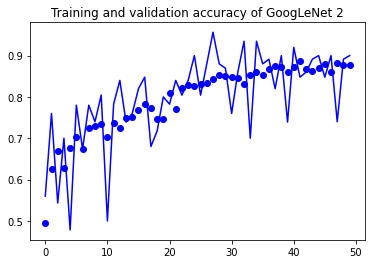

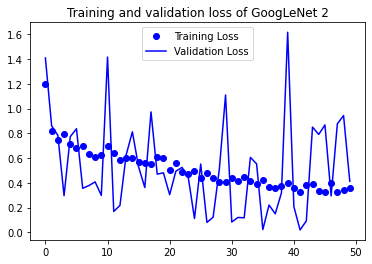

In [0]:
#Plot training/validation accuracy and loss
acc_g = history_g.history['acc']
val_acc_g = history_g.history['val_acc']
loss_g = history_g.history['loss']
val_loss_g = history_g.history['val_loss']

epochs_g = range(len(acc_g))

plt.plot(epochs_g, acc_g, 'bo', label='Training accuracy')
plt.plot(epochs_g, val_acc_g, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy of GoogLeNet 2')

plt.figure()

plt.plot(epochs_g, loss_g, 'bo', label='Training Loss')
plt.plot(epochs_g, val_loss_g, 'b', label='Validation Loss')
plt.title('Training and validation loss of GoogLeNet 2')
plt.legend()

plt.show()

##VGG

###Model building and fitting

In [0]:
model_v16 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096,activation="relu"),
        tf.keras.layers.Dense(4096,activation="relu"),
        tf.keras.layers.Dense(4, activation="softmax")
        ])

In [0]:
model_v16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [0]:
#compile the model
model_v16.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

###Model training and testing

In [0]:
# Train the model
history_v16 = model_v.fit_generator(
      train_generator,
      steps_per_epoch=90,  # 899 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,  # 115 images = batch_size * steps
      #callbacks = [callbacks],  
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
90/90 - 20s - loss: 1.1703 - acc: 0.4928 - val_loss: 0.9131 - val_acc: 0.5000
Epoch 2/100
90/90 - 19s - loss: 0.9111 - acc: 0.5584 - val_loss: 0.8312 - val_acc: 0.5400
Epoch 3/100
90/90 - 18s - loss: 0.8812 - acc: 0.6062 - val_loss: 0.9395 - val_acc: 0.4400
Epoch 4/100
90/90 - 19s - loss: 0.7595 - acc: 0.7041 - val_loss: 0.6923 - val_acc: 0.7400
Epoch 5/100
90/90 - 18s - loss: 0.6638 - acc: 0.7230 - val_loss: 0.4490 - val_acc: 0.8400
Epoch 6/100
90/90 - 19s - loss: 0.6460 - acc: 0.7631 - val_loss: 0.6410 - val_acc: 0.8000
Epoch 7/100
90/90 - 19s - loss: 0.5908 - acc: 0.7809 - val_loss: 0.4350 - val_acc: 0.8400
Epoch 8/100
90/90 - 20s - loss: 0.5297 - acc: 0.8065 - val_loss: 0.3178 - val_acc: 0.8800
Epoch 9/100
90/90 - 19s - loss: 0.5247 - acc: 0.8009 - val_loss: 0.6144 - val_acc: 0.7400
Epoch 10/100
90/90 - 19s - loss: 0.4725 - acc: 0.8242 - val_loss: 0.3973 - val_acc: 0.8600
Epoch 11/100
90/90 - 19

In [0]:
test_loss_v16, test_acc_v16 = model_v.evaluate_generator(test_generator, steps=23, verbose=2)
test_loss_v16, test_acc_v16

Instructions for updating:
Please use Model.evaluate, which supports generators.
23/23 - 22s - loss: 0.2121 - acc: 0.9130


(0.2120509296655655, 0.9130434989929199)

###Visualizaiton of results

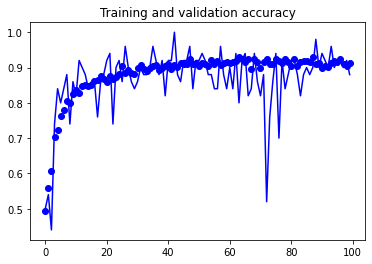

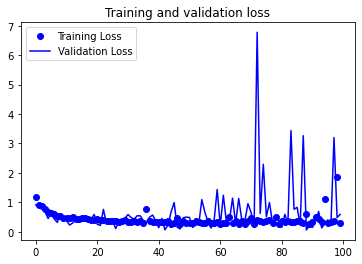

In [0]:
#Plot training/validation accuracy and loss
acc_v16 = history_v16.history['acc']
val_acc_v16 = history_v16.history['val_acc']
loss_v16 = history_v16.history['loss']
val_loss_v16 = history_v16.history['val_loss']

epochs_v16 = range(len(acc_v16))

plt.plot(epochs_v16, acc_v16, 'bo', label='Training accuracy')
plt.plot(epochs_v16, val_acc_v16, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs_v16, loss_v16, 'bo', label='Training Loss')
plt.plot(epochs_v16, val_loss_v16, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##VGG16 with Transfer Learning

###Model building and fitting

In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))


from keras import models
from keras import layers
from keras import optimizers

# Load the CONV layers of VGG16 model and add the FC layers

model_v = models.Sequential()
model_v.add(conv_base)
model_v.add(layers.Flatten())
model_v.add(layers.Dense(1000, activation='relu'))
model_v.add(layers.Dense(4, activation='softmax'))

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
conv_base.summary()
for layer in conv_base.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
model_v.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              25089000  
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4004      
Total params: 39,807,692
Trainable params: 32,172,428
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
#compile the model
model_v.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

###Model training and testing

In [0]:
# Train the model
history_v = model_v.fit_generator(
      train_generator,
      steps_per_epoch=90,  # 899 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,  # 115 images = batch_size * steps
      #callbacks = [callbacks],  
      verbose=2)

Epoch 1/100
 - 20s - loss: 0.1906 - acc: 0.9310 - val_loss: 0.0161 - val_acc: 0.9400
Epoch 2/100
 - 20s - loss: 0.1559 - acc: 0.9488 - val_loss: 0.0300 - val_acc: 0.9400
Epoch 3/100
 - 20s - loss: 0.1567 - acc: 0.9555 - val_loss: 1.5902 - val_acc: 0.9130
Epoch 4/100
 - 19s - loss: 0.1153 - acc: 0.9666 - val_loss: 0.0011 - val_acc: 0.9400
Epoch 5/100
 - 19s - loss: 0.2000 - acc: 0.9444 - val_loss: 7.5848e-04 - val_acc: 0.8913
Epoch 6/100
 - 20s - loss: 0.1706 - acc: 0.9499 - val_loss: 0.0038 - val_acc: 0.9400
Epoch 7/100
 - 20s - loss: 0.1002 - acc: 0.9700 - val_loss: 0.0000e+00 - val_acc: 0.9565
Epoch 8/100
 - 19s - loss: 0.1858 - acc: 0.9655 - val_loss: 0.0328 - val_acc: 0.9400
Epoch 9/100
 - 19s - loss: 0.1835 - acc: 0.9600 - val_loss: 0.0019 - val_acc: 0.9400
Epoch 10/100
 - 20s - loss: 0.1103 - acc: 0.9733 - val_loss: 0.2715 - val_acc: 0.9130
Epoch 11/100
 - 19s - loss: 0.3160 - acc: 0.9566 - val_loss: 0.0014 - val_acc: 0.9400
Epoch 12/100
 - 19s - loss: 0.1059 - acc: 0.9733 - val_

In [0]:
test_loss_v, test_acc_v = model_v.evaluate_generator(test_generator, steps=23, verbose=2)
test_loss_v, test_acc_v

(1.1443764378782362e-05, 0.9826086759567261)

###Visualization of results

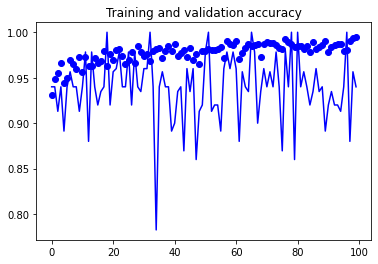

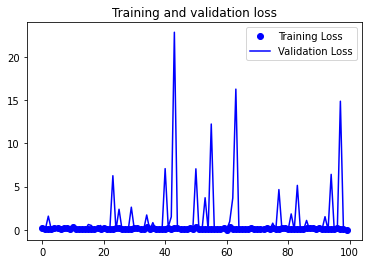

In [0]:
#Plot training/validation accuracy and loss
acc_v = history_v.history['acc']
val_acc_v = history_v.history['val_acc']
loss_v = history_v.history['loss']
val_loss_v = history_v.history['val_loss']

epochs_v = range(len(acc_v))

plt.plot(epochs_v, acc_v, 'bo', label='Training accuracy')
plt.plot(epochs_v, val_acc_v, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs_v, loss_v, 'bo', label='Training Loss')
plt.plot(epochs_v, val_loss_v, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##AlexNet

###Model building and fitting

In [0]:
model = tf.keras.models.Sequential([
    #Conv_1          #original model was built for input shape of 224X224
    tf.keras.layers.Conv2D(96, (11,11),strides=4, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    # Pooling_1
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    # Batch Normalisation_1
    tf.keras.layers.BatchNormalization(),
    # Conv_2
    tf.keras.layers.Conv2D(256, (11,11),strides=1, padding='valid', activation='relu'),
    # Pooling_2
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    #Batch Normalisation_2
    tf.keras.layers.BatchNormalization(),
    # Conv_3
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    # Conv_4
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    #conv_5
    tf.keras.layers.Conv2D(256, (3,3),strides=1, padding='valid', activation='relu'),
    #pooling_3
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    #Batch Normalization_4
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    #Dense layer_1
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #Dense layer_2
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #Dense layer_3
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [0]:
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

###Model trainig and testing

In [10]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=90,  # 899 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,  # 115 images = batch_size * steps
      callbacks = [callbacks],
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
90/90 - 321s - loss: 1.3498 - acc: 0.4861 - val_loss: 1.7382 - val_acc: 0.2600
Epoch 2/100
90/90 - 24s - loss: 1.3307 - acc: 0.5239 - val_loss: 1.7828 - val_acc: 0.3200
Epoch 3/100
90/90 - 20s - loss: 1.1443 - acc: 0.5762 - val_loss: 1.6421 - val_acc: 0.4600
Epoch 4/100
90/90 - 18s - loss: 1.2708 - acc: 0.5651 - val_loss: 1.0316 - val_acc: 0.6000
Epoch 5/100
90/90 - 17s - loss: 1.1330 - acc: 0.6174 - val_loss: 1.2846 - val_acc: 0.5400
Epoch 6/100
90/90 - 16s - loss: 1.2497 - acc: 0.5806 - val_loss: 1.7755 - val_acc: 0.6800
Epoch 7/100
90/90 - 15s - loss: 1.0796 - acc: 0.6129 - val_loss: 4.7232 - val_acc: 0.3400
Epoch 8/100
90/90 - 15s - loss: 1.1329 - acc: 0.5907 - val_loss: 2.0133 - val_acc: 0.5800
Epoch 9/100
90/90 - 15s - loss: 1.1019 - acc: 0.6274 - val_loss: 2.6110 - val_acc: 0.5600
Epoch 10/100
90/90 - 15s - loss: 1.1277 - acc: 0.6062 - val_loss: 1.6415 - val_acc: 0.6200
Epoch 11/100
90/90 - 1

In [0]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=23, verbose=2)

23/23 - 1s - loss: 0.3100 - acc: 0.8957


###Visualization of results

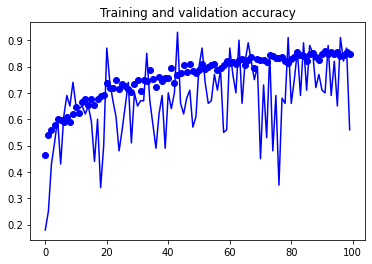

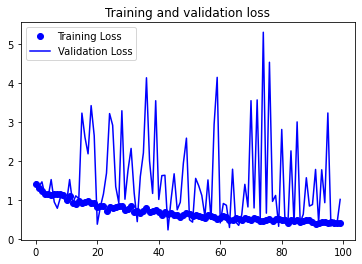

In [0]:
#Plot training/validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Customization of AlexNet

##Custom AlexNet no.1

###Model building and fitting

In [0]:
model_a = tf.keras.models.Sequential([
    #Conv_1          #original model was built for input shape of 224X224
    tf.keras.layers.Conv2D(96, (11,11),strides=4, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    # Pooling_1
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    # Batch Normalisation_1
    tf.keras.layers.BatchNormalization(),
    # Conv_2
    tf.keras.layers.Conv2D(256, (5,5),strides=1, padding='valid', activation='relu'),
    # Pooling_2
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    #Batch Normalisation_2
    tf.keras.layers.BatchNormalization(),
    # Conv_3
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    # Conv_4
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    # Conv_5
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    #conv_6
    tf.keras.layers.Conv2D(256, (3,3),strides=1, padding='valid', activation='relu'),
    #pooling_3
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    #Batch Normalization_4
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    #Dense layer_1
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #Dense layer_2
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #Dense layer_3
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [0]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [0]:
#Compile the model
model_a.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

###Model training and testing

In [0]:
# Train the model
history_a = model_a.fit_generator(
      train_generator,
      steps_per_epoch=90,  # 899 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20,  # 115 images = batch_size * steps
      callbacks = [callbacks],  
      verbose=2)

Epoch 1/100
90/90 - 540s - loss: 1.5344 - acc: 0.4171 - val_loss: 1.5389 - val_acc: 0.1900
Epoch 2/100
90/90 - 23s - loss: 1.3440 - acc: 0.5117 - val_loss: 1.6029 - val_acc: 0.1700
Epoch 3/100
90/90 - 21s - loss: 1.3069 - acc: 0.5217 - val_loss: 1.3638 - val_acc: 0.3900
Epoch 4/100
90/90 - 20s - loss: 1.2188 - acc: 0.5684 - val_loss: 0.8528 - val_acc: 0.6600
Epoch 5/100
90/90 - 20s - loss: 1.2229 - acc: 0.5662 - val_loss: 2.3541 - val_acc: 0.5300
Epoch 6/100
90/90 - 21s - loss: 1.2387 - acc: 0.5495 - val_loss: 10.2187 - val_acc: 0.3400
Epoch 7/100
90/90 - 21s - loss: 1.1636 - acc: 0.5651 - val_loss: 1.2305 - val_acc: 0.6600
Epoch 8/100
90/90 - 21s - loss: 1.1844 - acc: 0.5895 - val_loss: 5.1680 - val_acc: 0.3300
Epoch 9/100
90/90 - 21s - loss: 1.2643 - acc: 0.5862 - val_loss: 1.3232 - val_acc: 0.7000
Epoch 10/100
90/90 - 21s - loss: 1.1738 - acc: 0.5784 - val_loss: 2.7161 - val_acc: 0.5800
Epoch 11/100
90/90 - 21s - loss: 1.1493 - acc: 0.6062 - val_loss: 1.9782 - val_acc: 0.6400
Epoch 

In [0]:
test_loss_a, test_acc_a = model_a.evaluate_generator(test_generator, steps=23, verbose=2)

Instructions for updating:
Please use Model.evaluate, which supports generators.
23/23 - 58s - loss: 0.3273 - acc: 0.8696


###Visualization of results

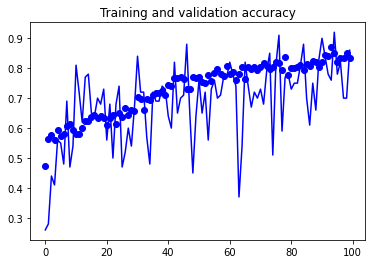

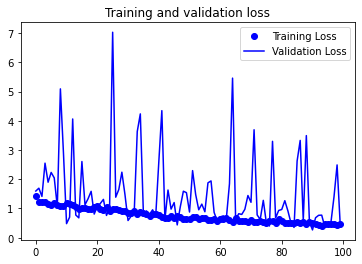

In [0]:
#Plot training/validation accuracy and loss
acc_a = history_a.history['acc']
val_acc_a = history_a.history['val_acc']
loss_a = history_a.history['loss']
val_loss_a = history_a.history['val_loss']

epochs_a = range(len(acc_a))

plt.plot(epochs_a, acc_a, 'bo', label='Training accuracy')
plt.plot(epochs_a, val_acc_a, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs_a, loss_a, 'bo', label='Training Loss')
plt.plot(epochs_a, val_loss_a, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Custom AlexNet no.2

###Model building and fitting

In [0]:
model_2 = tf.keras.models.Sequential([
    #Conv_1          #original model was built for input shape of 224X224
    tf.keras.layers.Conv2D(96, (11,11),strides=4, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    # Pooling_1
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    # Conv_2
    tf.keras.layers.Conv2D(256, (5,5),strides=1, padding='valid', activation='relu'),
    # Pooling_2
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    # Conv_3
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    #conv_5
    tf.keras.layers.Conv2D(256, (5,5),strides=1, padding='valid', activation='relu'),
    #pooling_3
    tf.keras.layers.MaxPooling2D((5, 5), strides=(1,1),padding='valid'),
    tf.keras.layers.Flatten(),
    #Dense layer_1
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    #Dense layer_2
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    #Dense layer_3
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [0]:
#initialize optimizer
RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
#compile the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop,
              metrics=['acc'])

In [0]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 384)        

###Model training and testing

In [0]:
history_2 = model_2.fit_generator(
      train_generator,
      steps_per_epoch=90,  # 899 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10, # 115 images = batch_size * steps
      #callbacks = [lr_sc],
      verbose = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
90/90 - 20s - loss: 1.4644 - acc: 0.5417 - val_loss: 3.9970 - val_acc: 0.5000
Epoch 2/100
90/90 - 19s - loss: 1.2863 - acc: 0.5806 - val_loss: 146.4069 - val_acc: 0.2400
Epoch 3/100
90/90 - 19s - loss: 1.0821 - acc: 0.6029 - val_loss: 3.4166 - val_acc: 0.6400
Epoch 4/100
90/90 - 20s - loss: 1.0934 - acc: 0.5829 - val_loss: 10.2241 - val_acc: 0.6600
Epoch 5/100
90/90 - 19s - loss: 1.0173 - acc: 0.6040 - val_loss: 12.3846 - val_acc: 0.4600
Epoch 6/100
90/90 - 20s - loss: 0.9088 - acc: 0.6463 - val_loss: 2.3058 - val_acc: 0.6000
Epoch 7/100
90/90 - 20s - loss: 0.9665 - acc: 0.6318 - val_loss: 7.8445 - val_acc: 0.5200
Epoch 8/100
90/90 - 19s - loss: 0.8897 - acc: 0.6552 - val_loss: 0.4643 - val_acc: 0.7800
Epoch 9/100
90/90 - 20s - loss: 0.9264 - acc: 0.6318 - val_loss: 0.6154 - val_acc: 0.7200
Epoch 10/100
90/90 - 20s - loss: 0.7936 - acc: 0.6986 - val_loss: 0.8369 - val_acc: 0.8200
Epoch 11/100
90/90 

In [0]:
test_loss_2, test_acc_2 = model_2.evaluate_generator(test_generator, steps=23, verbose=2)

Instructions for updating:
Please use Model.evaluate, which supports generators.
23/23 - 23s - loss: 0.5672 - acc: 0.8870


###Visualization of results

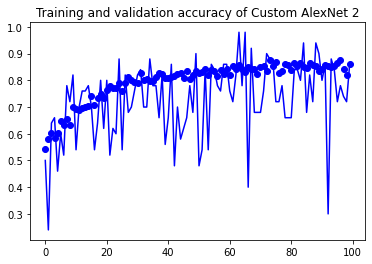

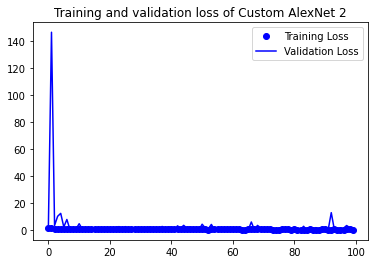

In [0]:
#Plot training/validation accuracy and loss
acc_2 = history_2.history['acc']
val_acc_2 = history_2.history['val_acc']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_2 = range(len(acc_2))

plt.plot(epochs_2, acc_2, 'bo', label='Training accuracy')
plt.plot(epochs_2, val_acc_2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy of Custom AlexNet 2')

plt.figure()

plt.plot(epochs_2, loss_2, 'bo', label='Training Loss')
plt.plot(epochs_2, val_loss_2, 'b', label='Validation Loss')
plt.title('Training and validation loss of Custom AlexNet 2')
plt.legend()

plt.show()

#Prediction results

[1. 0. 0. 0.]


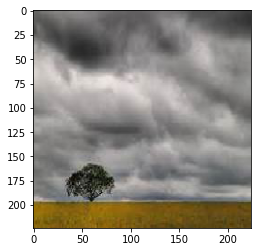

In [34]:
#get label of the image from test generator
x, y = test_generator.next()

image = x[4]
label = y[4]
print(label)
plt.imshow(image)
plt.show()

In [0]:
predict = model.predict(image)

In [51]:
#the list present the probability on each class
predict[4]

array([5.8668062e-02, 3.3595681e-03, 9.3721718e-01, 7.5526547e-04],
      dtype=float32)

In [52]:
#produce confusion matrix of the selected test image
test_generator.reset()
Y_pred = model.predict_generator(test_generator)
classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=-1)
sum(y_pred==classes)/10000


from sklearn.metrics import confusion_matrix
confusion_matrix(test_generator.classes[test_generator.index_array],y_pred)

array([[11,  5,  5,  9],
       [ 6,  4,  4,  8],
       [ 5,  6,  8,  7],
       [ 8,  6,  9, 14]])

In [0]:
pred = model.predict_generator(test_generator, 23)

In [0]:
#get prediction classes
# 0=cloudy; 1=rain; 2=shine; 3=sunrise
predicted_class_indices=np.argmax(pred,axis=1)

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [63]:
#show sample predictions
import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results[100:-5]

,Filename,Predictions
100,sunrise/sunrise295.jpg,sunrise
101,sunrise/sunrise31.jpg,rain
102,sunrise/sunrise310.jpg,cloudy
103,sunrise/sunrise331.jpg,cloudy
104,sunrise/sunrise345.jpg,sunrise
105,sunrise/sunrise40.jpg,cloudy
106,sunrise/sunrise47.jpg,shine
107,sunrise/sunrise51.jpg,cloudy
108,sunrise/sunrise55.jpg,shine
109,sunrise/sunrise56.jpg,sunrise
